<a href="https://colab.research.google.com/github/AndrianinaBA/NLP-practice/blob/main/ngram_practice_huggingface_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-gram Language Models - Practice with Real Data

**Course:** Natural Language Processing  
**Topic:** Building N-gram Models with HuggingFace Datasets  

In this notebook, you will:
1. Load real text corpora from HuggingFace
2. Implement n-gram language models from scratch
3. Train and evaluate your models
4. Generate text and compare different approaches

## Setup

In [ ]:
# Install required packages
!pip install datasets -q

import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import random
from datasets import load_dataset
from tqdm import tqdm

# Set random seed
np.random.seed(42)
random.seed(42)

print("✓ Setup complete!")

✓ Setup complete!


## Part 1: Load Dataset from HuggingFace

We'll use the **WikiText-2** dataset, which contains good quality text from Wikipedia articles.

In [ ]:
# Load WikiText-2 dataset
print("Loading WikiText-2 dataset...")
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

print("\nDataset structure:")
print(dataset)

# Explore the data
print("\nSample from training set:")
print(dataset['train'][0])
print("\n" + "="*60)
print(dataset['train'][1])

Loading WikiText-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Dataset structure:
DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

Sample from training set:
{'text': ''}

{'text': ' = Valkyria Chronicles III = \n'}


In [ ]:
dataset['validation'][256]

{'text': ' U.S. Highways \n'}

### Exercise 1.1: Data Exploration

Answer these questions:
1. How many examples are in train/validation/test splits?
2. What does each example look like?
3. How many empty or very short texts are there?

In [ ]:
# Question 1: Count examples in each split
train_size = len(dataset['train'])
valid_size = len(dataset['validation'])
test_size = len(dataset['test'])

print(f"Train size: {train_size}")
print(f"Validation size: {valid_size}")
print(f"Test size: {test_size}")

# Question 2: Look at a few examples
print("\nFirst 5 examples from training set:")
# TODO: YOUR CODE HERE - print first 5 examples
for i in range(5):
  print(dataset['train'][i])
  print("=" * 5)

# Question 3: Check for empty/short texts
print("\nChecking for empty or short texts:")
# TODO: YOUR CODE HERE - count texts with length 0 or < 5 words
# Hint: Use len(text['text'].split())
for feature in dataset.keys():
  count = 0
  curr_obj = dataset[feature]
  curr_feature_length = len(curr_obj)
  # print(type(curr_obj))
  for text in curr_obj:
    if text['text'] == '' or len(text['text'].split()) < 5 :
      count += 1
  print(f"For {feature}, there is {count} empty of short texts")

Train size: 36718
Validation size: 3760
Test size: 4358

First 5 examples from training set:
{'text': ''}
=====
{'text': ' = Valkyria Chronicles III = \n'}
=====
{'text': ''}
=====
{'text': ' Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n'}
=====
{'text': " The game began development in 2010 , carrying over a large portion of the work don

## Part 2: Data Preprocessing

### Exercise 2.1: Implement Text Preprocessing

In [ ]:
def preprocess_text(text: str, add_start_end: bool = True) -> List[str]:
    """
    Preprocess text:
    - Convert to lowercase
    - Split into tokens (simple whitespace tokenization)
    - Add <s> and </s> tokens if requested

    Args:
        text: Input text
        add_start_end: Whether to add start/end tokens

    Returns:
        List of tokens
    """
    # TODO: Implement this function
    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Split on whitespace
    splitted = text.split(sep=' ')

    # Step 3: Add <s> and </s> if requested
    if add_start_end :
      added_start = ["<s>"]
      added_start.extend(splitted)
      added_start.append("</s>")
      splitted = added_start[:]

    return splitted

# Test your function
test_text = "Hello World! This is a test."
tokens = preprocess_text(test_text, add_start_end=True)
print(f"Input: {test_text}")
print(f"Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']")
print(f"Your output: {tokens}")

Input: Hello World! This is a test.
Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']
Your output: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']


In [ ]:
Counter?

### Exercise 2.2: Prepare Training Corpus

In [ ]:
def prepare_corpus(dataset_split, max_examples: int = None) -> List[List[str]]:
    """
    Prepare corpus from dataset split.

    Args:
        dataset_split: HuggingFace dataset split
        max_examples: Maximum number of examples to use (None = all)

    Returns:
        List of tokenized sentences
    """
    corpus = []

    # TODO: Implement this function
    # 1. Iterate through the dataset
    # 2. Skip empty texts (text['text'].strip() == '')
    # 3. Preprocess each text using your function above
    # 4. Add to corpus only if result has more than 2 tokens
    # 5. Stop at max_examples if specified

    # Hint: Use this structure:
    count = 0
    for item in tqdm(dataset_split, desc="Processing"):
        text = item['text'].strip()
        if not text:
            continue
        if len(text) <= 2 :
            continue

        corpus.append(preprocess_text(text, add_start_end=True))
        count += 1
        if count == max_examples :
          break

    return corpus


# Prepare training corpus (use subset for speed)
print("Preparing training corpus...")
train_corpus = prepare_corpus(dataset['train'], max_examples=1000)

print(f"\nCorpus size: {len(train_corpus)} sentences")
print(f"First sentence: {train_corpus[0][:10]}...")  # Show first 10 tokens

Preparing training corpus...


Processing:   4%|▍         | 1538/36718 [00:00<00:01, 31967.61it/s]


Corpus size: 1000 sentences
First sentence: ['<s>', '=', 'valkyria', 'chronicles', 'iii', '=', '</s>']...


## Part 3: Build Vocabulary

In [ ]:
mylist = ['<s>', '=', 'valkyria', 'chronicles', 'iii', '=', '</s>']
counter = Counter(mylist)
print(counter)

another = ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']
counter.update(Counter(another))
print(counter)

Counter({'=': 2, '<s>': 1, 'valkyria': 1, 'chronicles': 1, 'iii': 1, '</s>': 1})
Counter({'<s>': 2, '=': 2, '</s>': 2, 'valkyria': 1, 'chronicles': 1, 'iii': 1, 'hello': 1, 'world!': 1, 'this': 1, 'is': 1, 'a': 1, 'test.': 1})


### Exercise 3.1: Build Vocabulary

In [ ]:
def build_vocabulary(corpus: List[List[str]]) -> set:
    """
    Build vocabulary from corpus.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Set of unique tokens
    """
    # TODO: Implement this function
    # Hint: Create a set and add all tokens from all sentences
    my_vocabs = set()
    for text_to_list in corpus:
        for string in text_to_list:
            my_vocabs.add(string)

    return my_vocabs

# Build vocabulary
vocab = build_vocabulary(train_corpus)
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {list(vocab)[:20]}")

Vocabulary size: 10690
Sample words: ['domestically', 'ylid', 'due', 'victorious', 'candi', 'martinek', 'wild', 'garuda', 'burney', 'aadt', 'elves', 'became', 'track', 'comedic', 'microlights', 'hai', 'clothing', 'disparate', 'page', 'coin']


## Part 4: Implement N-gram Counting

### Exercise 4.1: Count Unigrams

In [ ]:
def count_unigrams(corpus: List[List[str]]) -> Counter:
    """
    Count unigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with unigram counts
    """
    unigram_counts = Counter()

    # TODO: Implement this function
    # Iterate through corpus and count each token
    for text_to_list in corpus:
        unigram_counts.update(Counter(text_to_list))

    return unigram_counts


# Test
unigram_counts = count_unigrams(train_corpus)
print(f"Total unigrams: {sum(unigram_counts.values())}")
print(f"Unique unigrams: {len(unigram_counts)}")
print(f"\nMost common unigrams:")
print(unigram_counts.most_common(20))

Total unigrams: 90023
Unique unigrams: 10690

Most common unigrams:
[('the', 5757), (',', 4468), ('.', 3203), ('of', 2568), ('and', 2237), ('in', 1927), ('to', 1655), ('a', 1574), ('=', 1191), ('<s>', 1000), ('</s>', 1000), ('"', 961), ('was', 865), ('@-@', 782), ('with', 697), ('as', 663), ('for', 662), ('that', 623), ("'s", 606), ('on', 594)]


### Exercise 4.2: Count Bigrams

In [ ]:
def count_bigrams(corpus: List[List[str]]) -> Counter:
    """
    Count bigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with bigram counts (bigrams as tuples)
    """
    bigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create pairs of consecutive words
    # Store as tuples: (word1, word2)

    for text_to_list in corpus:
        for word1, word2 in zip(text_to_list[:-1], text_to_list[1:]) :
            bigram_counts[(word1, word2)] += 1


    return bigram_counts

# Test
bigram_counts = count_bigrams(train_corpus)
print(f"Total bigrams: {sum(bigram_counts.values())}")
print(f"Unique bigrams: {len(bigram_counts)}")
print(f"\nMost common bigrams:")
print(bigram_counts.most_common(20))

Total bigrams: 89023
Unique bigrams: 50573

Most common bigrams:
[(('of', 'the'), 837), (('=', '='), 656), ((',', 'and'), 607), (('.', '</s>'), 578), (('.', 'the'), 526), (('in', 'the'), 498), ((',', 'the'), 316), (('to', 'the'), 268), (('<s>', '='), 264), (('=', '</s>'), 264), (('on', 'the'), 199), (('<s>', 'the'), 181), (('for', 'the'), 178), (('and', 'the'), 177), (('with', 'the'), 170), (('at', 'the'), 157), (('.', 'in'), 156), (('.', '"'), 130), ((',', 'a'), 127), ((',', 'which'), 124)]


In [ ]:
bigram_counts[("<s>", "the")]

181

In [ ]:
unigram_counts["<s>"]

1000

### Exercise 4.3: Count Trigrams

In [ ]:
def count_trigrams(corpus: List[List[str]]) -> Counter:
    """
    Count trigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with trigram counts (trigrams as tuples)
    """
    trigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create triples of consecutive words
    # Store as tuples: (word1, word2, word3)
    for text_to_list in corpus :
        for word1, word2, word3 in zip(text_to_list[:-2], text_to_list[1: -1], text_to_list[2:]) :
            trigram_counts[(word1, word2, word3)] += 1

    return trigram_counts

# Test
trigram_counts = count_trigrams(train_corpus)
print(f"Total trigrams: {sum(trigram_counts.values())}")
print(f"Unique trigrams: {len(trigram_counts)}")
print(f"\nMost common trigrams:")
print(trigram_counts.most_common(20))

Total trigrams: 88023
Unique trigrams: 76398

Most common trigrams:
[(('<s>', '=', '='), 230), (('=', '=', '</s>'), 230), (('=', '=', '='), 196), ((',', 'and', 'the'), 65), (('the', 'blue', 'jackets'), 39), (('one', 'of', 'the'), 37), (('.', '"', '</s>'), 34), ((';', 'blackie', ','), 30), (('as', 'well', 'as'), 29), (('"', '.', '</s>'), 27), ((',', 'such', 'as'), 27), (('the', 'gold', 'dollar'), 27), (('strapping', 'young', 'lad'), 26), (('the', 'united', 'states'), 25), (('.', 'she', 'was'), 24), (('.', 'it', 'was'), 22), ((',', 'and', 'a'), 22), (('.', 'in', 'the'), 22), (('south', 'of', 'heaven'), 22), (('in', 'the', 'uk'), 21)]


In [ ]:
trigram_counts[('<s>', '=', '=')]

230

## Part 5: Implement Language Models

### Exercise 5.1: Unigram Model

In [ ]:
class UnigramModel:
    """Unigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.total_words = sum(self.unigram_counts.values())

    def probability(self, word: str) -> float:
        """Calculate P(word)."""
        # TODO: Implement this
        # P(word) = C(word) / N
        count = self.unigram_counts[word]
        return count / self.total_words

    def log_probability(self, word: str) -> float:
        """Calculate log P(word)."""
        # TODO: Implement this
        # Handle zero probability by returning float('-inf')
        prob = self.probability(word)
        if prob == 0:
            return -np.inf
        else :
            return np.log(prob)

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum of log probabilities of all words
        sum_log = 0.0
        for word in sentence:
            sum_log += self.log_probability(word)
        return sum_log

# Test your model
unigram_model = UnigramModel(train_corpus)
test_words = ["the", "of", "and", "<s>", "</s>"]
print("Unigram Probabilities:")
for word in test_words:
    prob = unigram_model.probability(word)
    print(f"  P({word}) = {prob:.6f}")

Unigram Probabilities:
  P(the) = 0.062289
  P(of) = 0.027166
  P(and) = 0.024167
  P(<s>) = 0.011302
  P(</s>) = 0.011302


### Exercise 5.2: Bigram Model

In [ ]:
class BigramModel:
    """Bigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word)."""
        # TODO: Implement this
        # P(wi | wi-1) = C(wi-1, wi) / C(wi-1)
        count_previous = self.unigram_counts[previous_word]
        return self.bigram_counts[(previous_word, word)] / count_previous

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)
        if prob == 0 :
            return -np.inf
        else :
            return np.log(prob)

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum log probabilities: log P(w2|w1) + log P(w3|w2) + ...
        sum_log = 0.0
        for word1, word2 in zip(sentence[:-1], sentence[1:]):
            sum_log += self.log_probability(word2, word1)
        return sum_log

# Test your model
bigram_model = BigramModel(train_corpus)
test_bigrams = [("<s>", "the"), ("the", "and"), ("of", "the")]
print("Bigram Probabilities:")
for w1, w2 in test_bigrams:
    prob = bigram_model.probability(w2, w1)
    print(f"  P({w2} | {w1}) = {prob:.6f}")

Bigram Probabilities:
  P(the | <s>) = 0.181000
  P(and | the) = 0.000000
  P(the | of) = 0.325935


### Exercise 5.3: Trigram Model

In [ ]:
class TrigramModel:
    """Trigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_counts = count_bigrams(corpus)
        self.trigram_counts = count_trigrams(corpus)

    def probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        # P(wi | wi-2, wi-1) = C(wi-2, wi-1, wi) / C(wi-2, wi-1)
        previous_words = self.bigram_counts[(prev_word2, prev_word1)]
        return self.trigram_counts[(prev_word2, prev_word1, word)] / previous_words

    def log_probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate log P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        prob = self.probability(prev_word2, prev_word1, word)
        if prob == 0:
            return -np.inf
        else:
            return np.log(prob)

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        sum_log = 0.0
        for word1, word2, word3 in zip(sentence[:-2], sentence[1: -1], sentence[2:]):
            sum_log += self.log_probability(word1, word2, word3)
        return sum_log

# Test your model
trigram_model = TrigramModel(train_corpus)
if len(train_corpus[0]) >= 3:
    w1, w2, w3 = train_corpus[0][:3]
    prob = trigram_model.probability(w3, w2, w1)
    print(f"P({w3} | {w1}, {w2}) = {prob:.6f}")

P(valkyria | <s>, =) = 0.003788


In [ ]:
trigram_counts[('<s>', '=', "valkyria")] / bigram_counts[("<s>", "=")]

0.003787878787878788

## Part 6: Model Evaluation - Perplexity

### Exercise 6.1: Implement Perplexity Calculation

In [ ]:
def calculate_perplexity(model, test_corpus: List[List[str]], model_type: str = "bigram") -> float:
    """
    Calculate perplexity for a language model.

    Perplexity = exp(-1/N * sum(log P(wi | context)))

    Args:
        model: Language model with sentence_log_probability method
        test_corpus: List of test sentences
        model_type: 'unigram', 'bigram', or 'trigram'

    Returns:
        Perplexity score
    """
    # TODO: Implement this function
    sum_log = 0.0
    total_words = 0

    # 1. Calculate total log probability across all sentences
    # 2. Count total words (excluding <s> for bigram/trigram)
    # 3. Calculate average log probability
    # 4. Return exp(-avg_log_prob)
    for sentence in test_corpus:
        if model_type == "unigram":
            sum_log += model.sentence_log_probability(sentence)
            total_words += len(sentence)
        elif model_type == "bigram":
            sum_log += model.sentence_log_probability(sentence)
            total_words += len(sentence) - 1
        elif model_type == "trigram":
            sum_log += model.sentence_log_probability(sentence)
            total_words += len(sentence) - 2
        elif model_type == "smoothed bigram":
            sum_log += model.sentence_log_probability(sentence)
            total_words += len(sentence) - 1

    avg = sum_log / total_words
    return np.exp(-avg)

# Prepare test corpus
print("Preparing test corpus...")
test_corpus = prepare_corpus(dataset['test'], max_examples=None)
print(f"Test corpus size: {len(test_corpus)} sentences")

# Calculate perplexities
print("\nCalculating perplexities...")
# TODO: Calculate and print perplexities for all three models
print(f"Perplexity for the unigram model : {calculate_perplexity(UnigramModel(test_corpus), test_corpus, "unigram")}")
print(f"Perplexity for the bigram model : {calculate_perplexity(BigramModel(test_corpus), test_corpus, "bigram")}")
print(f"Perplexity for the trigram model : {calculate_perplexity(TrigramModel(test_corpus), test_corpus, "trigram")}")

Preparing test corpus...


Processing: 100%|██████████| 4358/4358 [00:00<00:00, 9186.37it/s]


Test corpus size: 2889 sentences

Calculating perplexities...
Perplexity for the unigram model : 1007.8303046012911
Perplexity for the bigram model : 41.08484279229999
Perplexity for the trigram model : 3.563759344968665


In [ ]:
unigram_model.unigram_counts["homarus"]

0

## Part 7: Text Generation

### Exercise 7.1: Implement Text Generator

In [ ]:
class BigramGenerator:
    """Generate text using bigram model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_model = BigramModel(corpus)
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.next_word_probs = self._build_next_word_distribution()

    def _build_next_word_distribution(self) -> Dict:
        """Build distribution over next words for each word."""
        # TODO: Implement this
        # For each word w1, build dict of {w2: P(w2|w1)}
        next_word_dist = defaultdict(lambda: defaultdict(float))

        for (w1, w2), count in self.bigram_counts.items():
            next_word_dist[w1][w2] = count / self.unigram_counts[w1]

        return next_word_dist


    def generate(self, max_length: int = 20) -> List[str]:
        """Generate a sentence."""
        # TODO: Implement this
        # 1. Start with '<s>'
        # 2. Sample next word based on probabilities
        # 3. Stop at '</s>' or max_length
        # Hint: Use np.random.choice(words, p=probs)
        sentence = ['<s>']

        for _ in range(max_length):
            current_word = sentence[-1]

            if current_word not in self.next_word_probs:
                break

            next_words = list(self.next_word_probs[current_word].keys())
            next_probs = list(self.next_word_probs[current_word].values())

            next_word = np.random.choice(next_words, p=next_probs)
            sentence.append(next_word)

            if next_word == "</s>":
                break

        return sentence

# Test generator
generator = BigramGenerator(train_corpus)
print("Generated Sentences:")
print("=" * 60)
for i in range(10):
    sentence = generator.generate(max_length=20)
    print(f"{i+1}. {' '.join(sentence)}")

Generated Sentences:
1. <s> since 1995 album , a varying lineup of philadelphia facility . he made to include political conscious r & b
2. <s> an adequate legal tender . the buildings in the blockading squadron ( 180 – 97 ; she was recognized the
3. <s> the three shows with his father once again won the arsenal , famitsu enjoyed the gold dollar , then ,
4. <s> for the south wales than wide , have tried to the bigger gliding is carried out . </s>
5. <s> = the building . the end of heaven festival of release in the children , it is the first played
6. <s> most common traits suggest that he that is still retains responsibility for larger aerodromes supporting madero had vaguely imagined past
7. <s> gods . </s>
8. <s> the industry . the time production work , and other orders from the gods were generally favorable reviews ; and
9. <s> = characteristics to return for his second right , who are also painted in the formation of this time in
10. <s> with their worship other battleships hoisted

## Part 8: Smoothing

### Exercise 8.1: Implement Add-One Smoothing

In [ ]:
class BigramModelSmoothed:
    """Bigram model with add-one smoothing."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.vocab = build_vocabulary(corpus)
        self.vocab_size = len(self.vocab)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word) with add-one smoothing.

        Formula: P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)
        """
        # TODO: Implement this
        C = self.unigram_counts[previous_word]
        return (self.bigram_counts[(previous_word, word)] + 1.0) / (C + self.vocab_size) # This part is fishy

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)
        if prob == 0.0 :
            return -np.inf
        else :
            return np.log(prob)

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        sum_log = 0.0
        for word1, word2 in zip(sentence[:-1], sentence[1:]):
            sum_log += self.log_probability(word2, word1)
        return sum_log

# Compare with unsmoothed model
smoothed_model = BigramModelSmoothed(train_corpus)

# Test on unseen bigrams
test_unseen = [("<s>", "quantum"), ("the", "xylophone"), ("amazing", "unicorn")]
print("Comparison: Unsmoothed vs Smoothed")
print("=" * 60)
for w1, w2 in test_unseen:
    unsmoothed = bigram_model.probability(w2, w1)
    smoothed = smoothed_model.probability(w2, w1)
    print(f"P({w2} | {w1}):")
    print(f"  Unsmoothed: {unsmoothed:.8f}")
    print(f"  Smoothed:   {smoothed:.8f}")
    print()

Comparison: Unsmoothed vs Smoothed
P(quantum | <s>):
  Unsmoothed: 0.00000000
  Smoothed:   0.00001107

P(xylophone | the):
  Unsmoothed: 0.00000000
  Smoothed:   0.00000507

P(unicorn | amazing):
  Unsmoothed: 0.00000000
  Smoothed:   0.00001500



## Part 9: Analysis and Comparison

### Exercise 9.1: Compare All Models

In [ ]:
# TODO: Create a comparison table showing:
# 1. Number of parameters (unique n-grams)
# 2. Training perplexity
# 3. Test perplexity
# 4. Sample generated sentences

import pandas as pd

train_corpus = prepare_corpus(dataset['train'], max_examples=None)
test_corpus = prepare_corpus(dataset['test'], max_examples=None)

comparison_data = {
    'Model': ['Unigram', 'Bigram', 'Trigram', 'Bigram (Smoothed)'],
    'Parameters': [
        len(unigram_counts),
        len(bigram_counts),
        len(trigram_counts),
        len(bigram_counts)
    ],
    'Train Perplexity': [
        # TODO: Fill in
        calculate_perplexity(UnigramModel, train_corpus, "unigram"),
        calculate_perplexity(BigramModel, train_corpus, "bigram"),
        calculate_perplexity(TrigramModel, train_corpus, "trigram"),
        calculate_perplexity(BigramModelSmoothed, train_corpus, "smoothed bigram")
    ],
    'Test Perplexity': [
        # TODO: Fill in
        calculate_perplexity(UnigramModel, test_corpus, "unigram"),
        calculate_perplexity(BigramModel, test_corpus, "bigram"),
        calculate_perplexity(TrigramModel, test_corpus, "trigram"),
        calculate_perplexity(BigramModelSmoothed, test_corpus, "smoothed bigram")
    ]
}

df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(df.to_string(index=False))

Processing: 100%|██████████| 4358/4358 [00:00<00:00, 30813.12it/s]



Model Comparison:
            Model  Parameters  Train Perplexity  Test Perplexity
          Unigram       10690       1288.551094      1007.830305
           Bigram       50573         89.642095        41.084843
          Trigram       76398          7.179289         3.563759
Bigram (Smoothed)       50573       3767.669882      2587.575249


### Exercise 9.2: Visualize Results

In [ ]:
import matplotlib.pyplot as plt


# TODO: Create visualizations:
# 1. Bar chart of perplexities

# 2. Top-20 most common words
unigram_common = unigram_counts.most_common(20) # list of tuples
elements_unigram = [word[0] for word in unigram_common]
elements_count_unigram = [word[1] for word in unigram_common]

# 3. Top-20 most common bigrams
bigram_common = bigram_counts.most_common(20) # list of tuples
elements_bigram = [word[0] for word in bigram_common]
elements_bigram = [' | '.join([str1, str2]) for (str1, str2) in elements_bigram]
elements_count_bigram = [word[1] for word in bigram_common]

# print(elements_bigram)

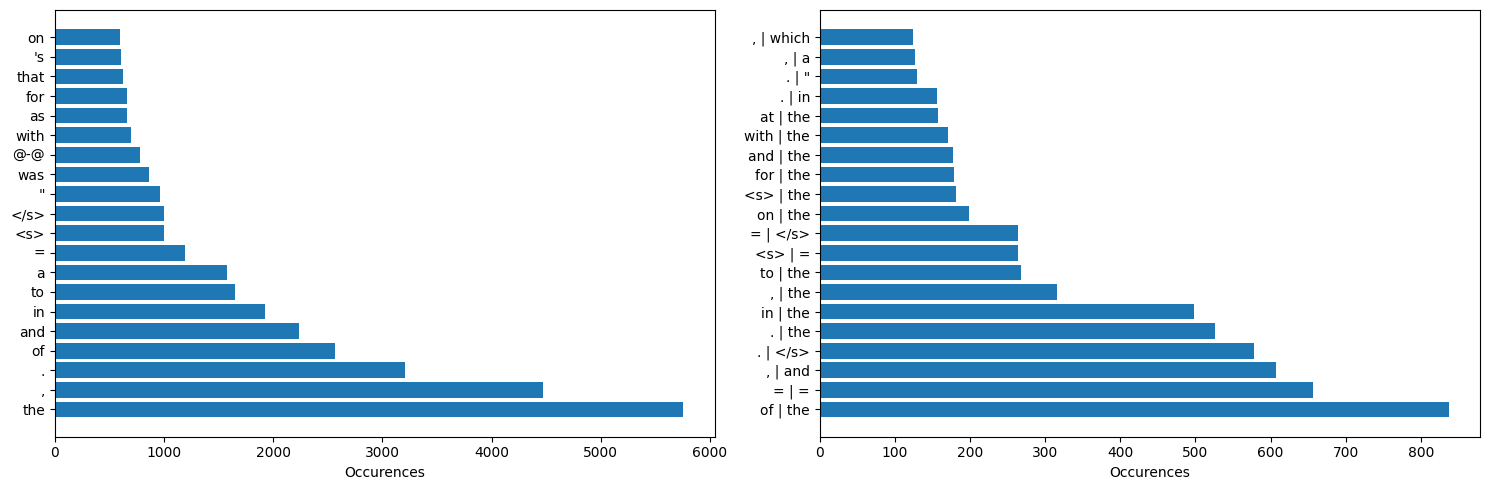

In [ ]:
# Example for most common words:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Most common unigrams
# TODO: YOUR CODE HERE

axes[0].barh(elements_unigram, elements_count_unigram)
axes[0].set_xlabel("Occurences")

# Plot 2: Most common bigrams
# TODO: YOUR CODE HERE
axes[1].barh(elements_bigram, elements_count_bigram)
axes[1].set_xlabel("Occurences")

plt.tight_layout()
plt.show()

## Part 10: Bonus Challenges

### Challenge 1: Try Different Datasets

Load a different dataset from HuggingFace and train your models on it.

Suggestions:
- `"wikitext"` (different versions)
- `"bookcorpus"`
- `"ptb_text_only"` (Penn Treebank)
- `"imdb"` (movie reviews)

In [ ]:
# TODO: YOUR CODE HERE
# Try loading and training on a different dataset
dataset = load_dataset("wikitext", "wikitext-103-raw-v1")

wikitext-103-raw-v1/train-00000-of-00002(…):   0%|          | 0.00/157M [00:00<?, ?B/s]

wikitext-103-raw-v1/train-00001-of-00002(…):   0%|          | 0.00/157M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

### Challenge 2: Implement Better Smoothing

Implement add-k smoothing (where k < 1) or interpolation smoothing.

In [ ]:
# TODO: YOUR CODE HERE

### Challenge 3: Build a Simple Autocomplete System

Given a partial sentence, suggest the top-k most likely next words.

In [ ]:
def autocomplete(partial_sentence: str, model: BigramModel, k: int = 5) -> List[Tuple[str, float]]:
    """
    Suggest next words for autocomplete.

    Args:
        partial_sentence: Incomplete sentence
        model: Trained bigram model
        k: Number of suggestions

    Returns:
        List of (word, probability) tuples
    """
    # TODO: Implement this
    pass

# Test
test_partial = "the cat sat on the"
suggestions = autocomplete(test_partial, bigram_model, k=5)
print(f"Suggestions for: '{test_partial}'")
for word, prob in suggestions:
    print(f"  {word}: {prob:.4f}")